In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings (if desired)


In [232]:
#df = pd.read_csv('cluster_0.csv')
#df = pd.read_csv('cluster_1.csv')
df = pd.read_csv('cluster_2.csv')
#df = pd.read_csv('cluster_3.csv')
#df = pd.read_csv('cluster_4.csv')

In [233]:
df.head(3)

,price,odometer,state,lat,long,Odometer_Price_Ratio,condition_excellent,condition_fair,condition_good,condition_like new,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_freq,manufacturer_freq,paint_color_freq,car_age_freq,cylinders_freq,cluster
0,15000,128000,al,32.592,-85.5189,8.533333,1,0,0,0,...,0,0,0,1,0.123949,0.172124,0.182027,0.070794,0.359397,0
1,27990,68696,al,32.590,-85.4800,2.454305,0,0,1,0,...,1,1,0,0,0.083903,0.036473,0.182027,0.063972,0.272611,0
2,34590,29499,al,32.590,-85.4800,0.852819,0,0,1,0,...,1,1,0,0,0.083903,0.139323,0.151546,0.047726,0.359397,0


In [234]:
# Extract unique states from the 'state' column
unique_states = df['state'].unique()
# Convert the unique states array to a list
states_list = unique_states.tolist()
# Print the list of states
print(states_list)
print(len(states_list))

['al', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'id', 'il', 'in', 'ia', 'ky', 'la', 'ma', 'mi', 'mn', 'ms', 'mo', 'nc', 'nj', 'ny', 'nh', 'oh', 'or', 'pa', 'sc', 'tn', 'tx', 'va', 'wv', 'wi']
33


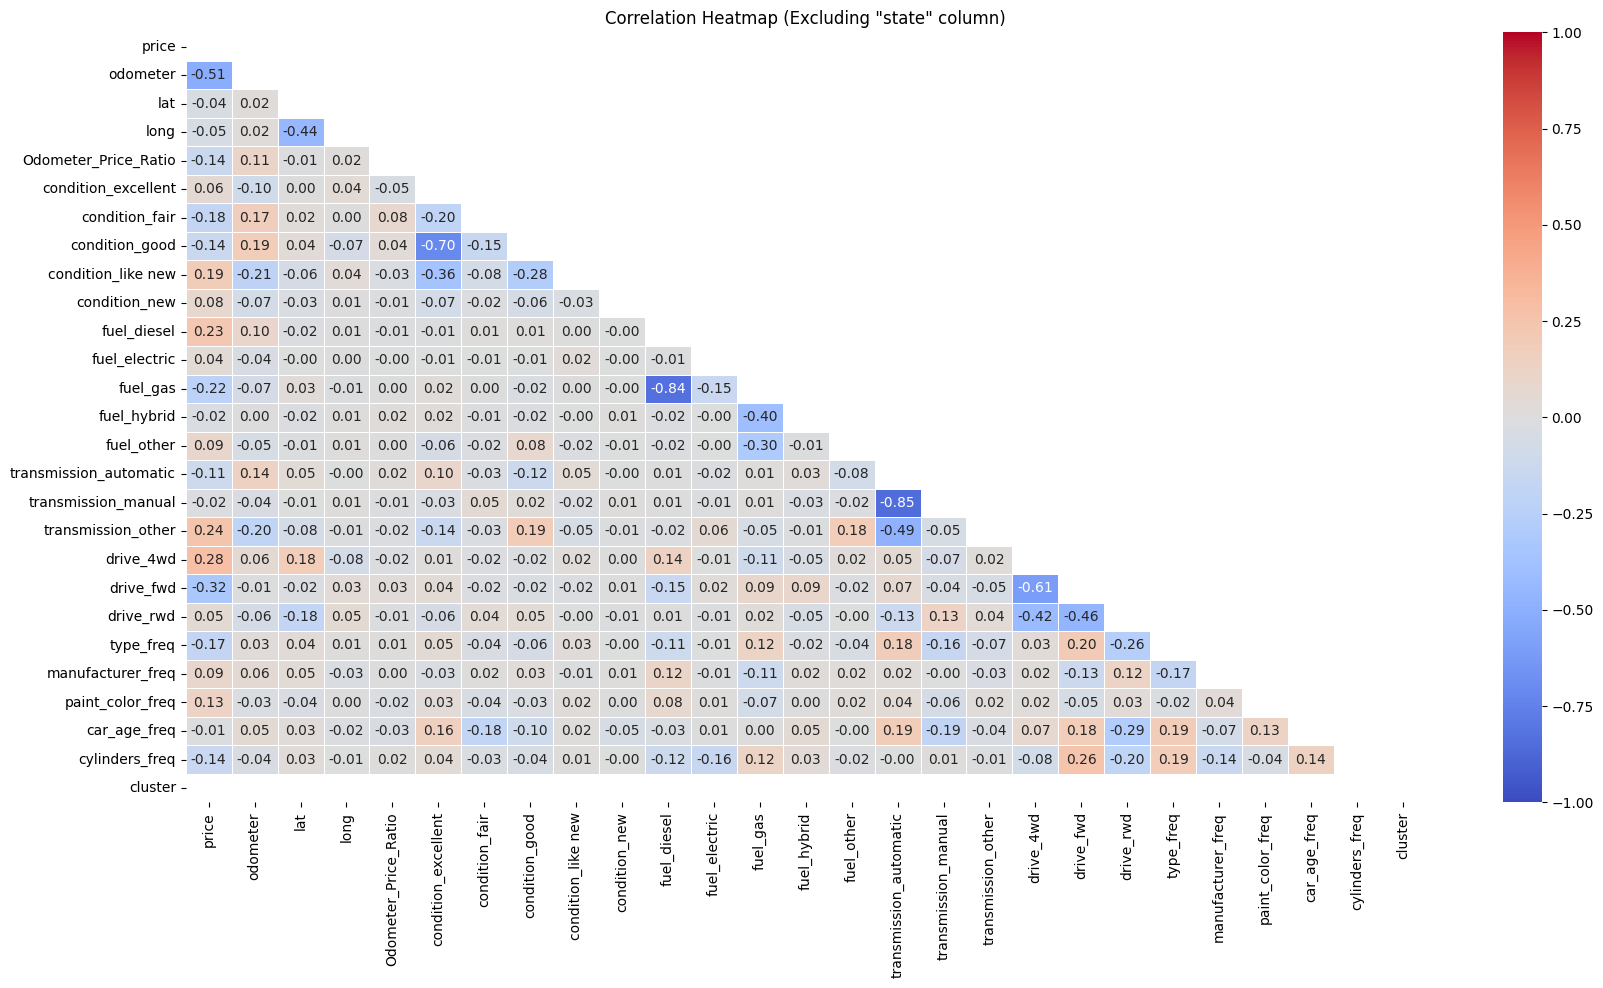

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Exclude 'state' column from the dataframe
df_without_state = df.drop(columns=['state'])

# Normalize the data to z-scores
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_state), columns=df_without_state.columns)

# Calculate the correlation matrix
corr_matrix = df_scaled.corr()

# Creating a mask for the upper triangle (to display only the lower triangle)
mask = ~np.tri(corr_matrix.shape[0], k=-1, dtype=bool)

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', center=0, 
            vmin=-1, vmax=1, linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Heatmap (Excluding "state" column)')
plt.show()


In [236]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Assuming a classification task

# Import libraries for visualization (replace with our preferred ones)
import matplotlib.pyplot as plt
import seaborn as sns  # For biplot


In [237]:
# Check for missing values (handle if necessary)
print(df_without_state.isnull().sum())

# Scale data (assuming numerical features)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_state), columns=df_without_state.columns)


price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


In [238]:
# Analyze the scree plot to decide on the number of components (e.g., using the elbow method)
# Replace 'n_components' with our chosen number based on the scree plot
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

In [239]:
pca = PCA()
principal_components = pca.fit_transform(df_scaled)
explained_variances = pca.explained_variance_ratio_
num_components = len(explained_variances)

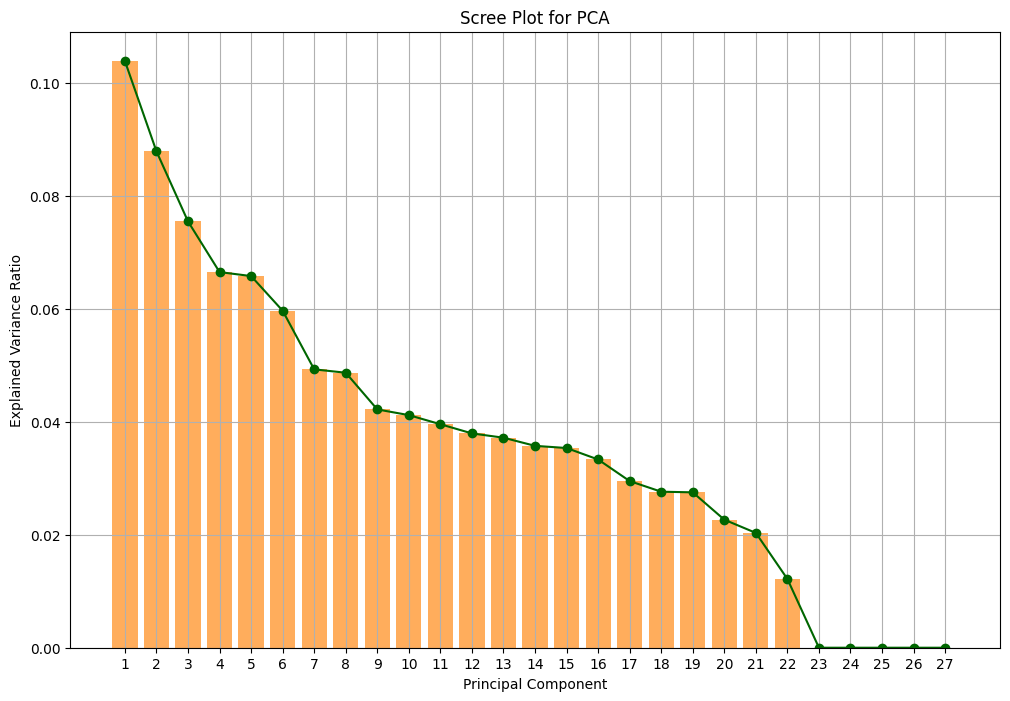

In [240]:

plt.figure(figsize=(12, 8))
plt.bar(np.arange(1, num_components + 1), explained_variances, color='#FF9933', alpha=0.8)
plt.plot(np.arange(1, num_components + 1), explained_variances, marker='o', linestyle='-', color='#006600')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, num_components + 1))
plt.grid(True)
plt.show()


In [241]:
df.columns

Index(['price', 'odometer', 'state', 'lat', 'long', 'Odometer_Price_Ratio',
       'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_new', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd',
       'drive_rwd', 'type_freq', 'manufacturer_freq', 'paint_color_freq',
       'car_age_freq', 'cylinders_freq', 'cluster'],
      dtype='object')

In [242]:
#Train ,TEST Split
x = df.drop(columns=["price","lat","long","cluster","state","Odometer_Price_Ratio"])
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [243]:
training_r2_score = []
testing_r2_score = []
training_RMSE_score = []
testing_RMSE_score = []

In [244]:

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred= model.predict(x_train)
    x_test_pred= model.predict(x_test)
    r2train = r2_score(y_train,x_train_pred)*100
    r2test = r2_score(y_test,x_test_pred)*100
    msetrain = mean_squared_error(y_train, x_train_pred)
    rmstrain = np.sqrt(msetrain)
    msetest = mean_squared_error(y_test, x_test_pred)
    rmstest = np.sqrt(msetest)
    training_r2_score.append(r2train)
    testing_r2_score.append(r2test)
    training_RMSE_score.append(rmstrain)
    testing_RMSE_score.append(rmstest)
    print(f"r2_Score of {model} model on training Data is:",r2train)
    print(f"r2_Score of {model} model on testing Data is:",r2test)
    print(f"RMSE of {model} model on training Data is:",rmstrain)
    print(f"RMSE of {model} model on testing Data is:",rmstest)
    print(f"***************************************************")
    print(f"***************************************************")

In [245]:
from xgboost import XGBRegressor
model_prediction(LinearRegression())
model_prediction(DecisionTreeRegressor())
model_prediction(RandomForestRegressor())
model_prediction(XGBRegressor())


r2_Score of LinearRegression() model on training Data is: 51.027283660207054
r2_Score of LinearRegression() model on testing Data is: 50.74034403351402
RMSE of LinearRegression() model on training Data is: 7921.449802324311
RMSE of LinearRegression() model on testing Data is: 7957.372126688698
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.9785818196971
r2_Score of DecisionTreeRegressor() model on testing Data is: 52.17162999167763
RMSE of DecisionTreeRegressor() model on training Data is: 165.66045996194381
RMSE of DecisionTreeRegressor() model on testing Data is: 7840.915459371607
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.47997566835987
r2_Score of RandomForestRegressor() model on testing Data is: 74.29862393753372
RMSE of RandomForestRe

In [246]:
models = ["Linear Regression","Decision Tree","Random Forest","XGBoost"]

In [247]:
training_r2_score


[51.027283660207054, 99.9785818196971, 96.47997566835987, 90.6006969375316]

In [248]:
testing_r2_score 


[50.74034403351402, 52.17162999167763, 74.29862393753372, 79.5823034186466]

In [249]:
training_RMSE_score 


[7921.449802324311, 165.66045996194381, 2123.7354206958516, 3470.3669936309107]

In [250]:
testing_RMSE_score 

[7957.372126688698, 7840.915459371607, 5747.806898350785, 5123.035366139439]

In [251]:
model_df = pd.DataFrame({"Algorithm":models, "Training r2_Score":training_r2_score,"Testing r2_Score":testing_r2_score, "Training RMSE":training_RMSE_score, "Testing RMSE":testing_RMSE_score})
model_df

,Algorithm,Training r2_Score,Testing r2_Score,Training RMSE,Testing RMSE
0,Linear Regression,51.027284,50.740344,7921.449802,7957.372127
1,Decision Tree,99.978582,52.171630,165.660460,7840.915459
2,Random Forest,96.479976,74.298624,2123.735421,5747.806898
3,XGBoost,90.600697,79.582303,3470.366994,5123.035366


In [252]:
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import plotly


# Creating a figure with two subplots (horizontal bar charts)
fig = go.Figure()

# Add first subplot (horizontal bar chart for Testing Score)
fig.add_trace(
    go.Bar(
        y=model_df['Algorithm'],
        x=model_df['Testing r2_Score'],
        orientation='h',
        text=model_df['Testing r2_Score'],
        name='Testing Score',
        marker=dict(color='Green')  # Specify color for Testing Score bars
    )
)

# Add second subplot (horizontal bar chart for Training Score)
fig.add_trace(
    go.Bar(
        y=model_df['Algorithm'],
        x=model_df['Training r2_Score'],
        orientation='h',
        text=model_df['Training r2_Score'],
        name='Training Score',
        marker=dict(color='red')  # Specify color for Training Score bars
    )
)

# Update layout properties for the figure
fig.update_layout(
    title='Model Scores Comparison',
    barmode='group',  # Display bars side by side
    xaxis_title='Score',  # X-axis title
    yaxis_title='Algorithm',  # Y-axis title
    height=600,  # Set figure height
    width=800,   # Set figure width
    margin=dict(l=100, r=100, t=100, b=100),  # Set margins
    showlegend=True  # Show legend
)

# Show the combined figure with both subplots
fig.show()


In [253]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def model_prediction(model, x_train, y_train, x_test, y_test, external_data):
    # Train the model using training data (x_train, y_train)
    model.fit(x_train, y_train)
    
    # Make predictions on test data (x_test)
    y_pred_test = model.predict(x_test)
    
    # Evaluate the model on test data
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Make predictions on external data
    external_pred = model.predict(external_data)
    
    return external_pred, test_r2, test_rmse

# Load external data
external_data = pd.read_csv('ext.csv')

# Assuming x_train, y_train, x_test, y_test are defined

# Define the list of models to test
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('XGBoost', XGBRegressor()),
    ('Linear Regression', LinearRegression())
]

# List to store external data predictions for each model
external_data_predictions = []

# Loop through each model
for model_name, model in models:
    print(f"Testing {model_name} model...")
    
    # Create a new instance of the model
    model_instance = model
    
    # Use the model_prediction function to make predictions on external data
    external_pred, test_r2, test_rmse = model_prediction(model_instance, x_train, y_train, x_test, y_test, external_data)
    
    # Store the predictions along with the model name and evaluation metrics
    external_data_predictions.append((model_name, external_pred, test_r2, test_rmse))

# Display predictions and evaluation metrics for each model
for model_name, pred, test_r2, test_rmse in external_data_predictions:
    print(f"Predicted price using {model_name} model: {pred}")
    print(f"Test R2 Score: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")
# Display predictions and evaluation metrics for each model
for model_name, pred, test_r2, test_rmse in external_data_predictions:
    print(f"Predicted price using {model_name} model: {pred}")
    print(f"Test R2 Score: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")
    
    # Calculate Mean Squared Error (MSE)
    mse = test_rmse**2
    print(f"Test MSE: {mse:.4f}")


Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [13408.96]
Test R2 Score: 0.7409, Test RMSE: 5771.2440
Predicted price using Decision Tree model: [14000.]
Test R2 Score: 0.5273, Test RMSE: 7795.1274
Predicted price using XGBoost model: [13022.526]
Test R2 Score: 0.7958, Test RMSE: 5123.0354
Predicted price using Linear Regression model: [12860.69573033]
Test R2 Score: 0.5074, Test RMSE: 7957.3721
Predicted price using Random Forest model: [13408.96]
Test R2 Score: 0.7409, Test RMSE: 5771.2440
Test MSE: 33307256.9225
Predicted price using Decision Tree model: [14000.]
Test R2 Score: 0.5273, Test RMSE: 7795.1274
Test MSE: 60764010.8437
Predicted price using XGBoost model: [13022.526]
Test R2 Score: 0.7958, Test RMSE: 5123.0354
Test MSE: 26245491.3627
Predicted price using Linear Regression model: [12860.69573033]
Test R2 Score: 0.5074, Test RMSE: 7957.3721
Test MSE: 633197